In [1]:
import seaborn as sb
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = sb.load_dataset('diamonds')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

Create a DF from x,y,z

Run KMeans on DF

Add the lables column to the DF

Run KNN on new DF - check your score of the clustering

Replace x,y,z in the original DF with the cluster and train the below:

Models: - RF Regressor for price
1. original DF (just numeric) + x,y,z, 
2. original DF (just numeric) + labels of x,y,z
3. df of model 2 plus dammy vars, drop first=True
4. model number 2 plus dummy false, 
5. model number 2 plus label encoder

In [5]:
df2 = df.copy()

In [6]:
df2 = df2[ ['x', 'y', 'z']  ]

In [7]:
kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(df2)

KMeans(n_clusters=3)

In [9]:
df2['res'] = kmeans.labels_

In [10]:
df2.head()

,x,y,z,res
0,3.95,3.98,2.43,1
1,3.89,3.84,2.31,1
2,4.05,4.07,2.31,1
3,4.20,4.23,2.63,1
4,4.34,4.35,2.75,1


In [11]:
df2.res.value_counts()

1    24582
0    21272
2     8086
Name: res, dtype: int64

In [12]:
import sklearn.neighbors as knn

In [13]:
X = df2.drop('res', axis=1)
y = df2.res

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
model = knn.KNeighborsClassifier()

In [17]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
model.score(X_test, y_test)

0.9984270546598506

In [19]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


# 1. original DF (just numeric) + x,y,z

In [20]:
df2_1 = df.drop(['cut', 'color', 'clarity'], axis=1)

In [21]:
df2_1.head(2)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31


In [22]:
X = df2_1.drop('price', axis=1)
y = df2_1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)
model = RandomForestRegressor(random_state=47)
model.fit(X_train, y_train)
score1 = model.score(X_test, y_test)
score1

0.8820934259673481

# 2. original DF (just numeric) + labels of x,y,z

In [23]:
df2_1 = df.drop(['cut', 'color', 'clarity', 'x', 'y', 'z'], axis=1)

In [24]:
df2_1.head(2)

,carat,depth,table,price
0,0.23,61.5,55.0,326
1,0.21,59.8,61.0,326


In [25]:
df2_1 = pd.concat([df2_1, df2[['res']]], axis=1)

In [26]:
df2_1.head(2)

,carat,depth,table,price,res
0,0.23,61.5,55.0,326,1
1,0.21,59.8,61.0,326,1


In [27]:
X = df2_1.drop('price', axis=1)
y = df2_1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)
model = RandomForestRegressor(random_state=47)
model.fit(X_train, y_train)
score2 = model.score(X_test, y_test)
score2

0.874402403252314

# 3. df of model 2 plus dammy vars, drop first=True

In [28]:
df2_1 = df.drop(['x', 'y', 'z'], axis=1)
df2_1 = pd.concat([df2_1, df2[['res']]], axis=1)

In [29]:
df2_1.head(2)

,carat,cut,color,clarity,depth,table,price,res
0,0.23,Ideal,E,SI2,61.5,55.0,326,1
1,0.21,Premium,E,SI1,59.8,61.0,326,1


In [30]:
df2_1 = pd.get_dummies(df2_1, columns=['cut', 'color', 'clarity'], drop_first=True)

In [31]:
df2_1.head(2)

,carat,depth,table,price,res,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [32]:
X = df2_1.drop('price', axis=1)
y = df2_1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)
model = RandomForestRegressor(random_state=47)
model.fit(X_train, y_train)
score3 = model.score(X_test, y_test)
score3

0.9757452634215216

# 4. df of model 2 plus dammy vars, drop first=False

In [33]:
df2_1 = df.drop(['x', 'y', 'z'], axis=1)
df2_1 = pd.concat([df2_1, df2[['res']]], axis=1)

In [34]:
df2_1.head(2)

,carat,cut,color,clarity,depth,table,price,res
0,0.23,Ideal,E,SI2,61.5,55.0,326,1
1,0.21,Premium,E,SI1,59.8,61.0,326,1


In [35]:
df2_1 = pd.get_dummies(df2_1, columns=['cut', 'color', 'clarity'], drop_first=False)

In [36]:
df2_1.head(2)

,carat,depth,table,price,res,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
X = df2_1.drop('price', axis=1)
y = df2_1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)
model = RandomForestRegressor(random_state=47)
model.fit(X_train, y_train)
score4 = model.score(X_test, y_test)
score4

0.9794856040978656

# 5. df of model 2 plus label encoder

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
df2_1 = df.drop(['x', 'y', 'z'], axis=1)
df2_1 = pd.concat([df2_1, df2[['res']]], axis=1)

In [41]:
df2_1.head(2)

,carat,cut,color,clarity,depth,table,price,res
0,0.23,Ideal,E,SI2,61.5,55.0,326,1
1,0.21,Premium,E,SI1,59.8,61.0,326,1


In [42]:
df_cat = df[['cut', 'color', 'clarity']]

In [43]:
df_cat.apply(LabelEncoder().fit_transform)

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
...,...,...,...
53935,2,0,2
53936,1,0,2
53937,4,0,2
53938,3,4,3


In [44]:
df2_1 = df.drop(['cut', 'color', 'clarity'], axis=1)
df2_1 = pd.concat([df2_1, df_cat.apply(LabelEncoder().fit_transform)], axis=1)

In [45]:
df2_1.head(2)

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2


In [46]:
X = df2_1.drop('price', axis=1)
y = df2_1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)
model = RandomForestRegressor(random_state=47)
model.fit(X_train, y_train)
score5 = model.score(X_test, y_test)
score5

0.9807820442441798

# Results

In [47]:
models = ['model 1','model 2','model 3', 'model 4', 'model 5']
tests_score = [score1, score2, score3, score4, score5]

In [48]:
compare_models = pd.DataFrame({ "Models": models, "Tests score": tests_score })
compare_models.sort_values(by = "Tests score", ascending = False)

,Models,Tests score
4,model 5,0.980782
3,model 4,0.979486
2,model 3,0.975745
0,model 1,0.882093
1,model 2,0.874402


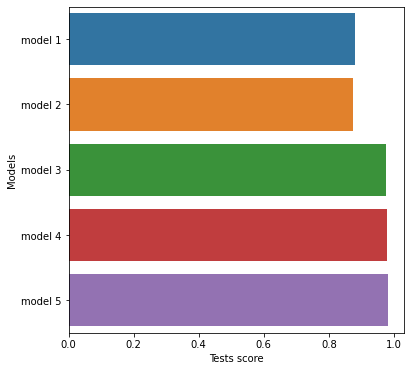

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
sns.barplot(x = "Tests score", y = "Models", data = compare_models)
plt.show()